<a href="https://colab.research.google.com/github/kb10241024/CLASSIFIER_MODELS/blob/master/000Multiclass_Classification/MNIST-and-Fashion_MNIST/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [1]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callback=myCallback()      
x_train=x_train/255.0
x_test=x_test/255.0
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
# YOUR CODE SHOULD START HERE
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)    
# YOUR CODE SHOULD END HERE
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(x_train, y_train, epochs=10, callbacks=[callback])

model.evaluate(x_test,y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1860 - acc: 0.9432
Epoch 2/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0752 - acc: 0.9760
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0482 - acc: 0.9850
Epoch 4/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0348 - acc: 0.9888
Epoch 5/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0270 - acc: 0.9914
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 69us/sample - loss: 0.0701 - acc: 0.9791


[0.07013757576953794, 0.9791]

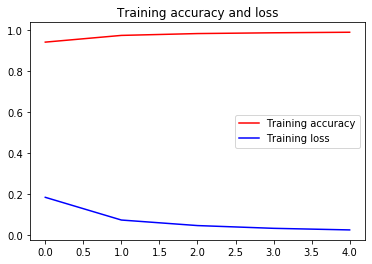

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [0]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x:tf.expand_dims(x,axis=-1),input_shape=(28, 28)),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

In [12]:
history2 = model.fit(x_train, y_train, epochs=10, callbacks=[callback])

model.evaluate(x_test,y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.1216 - acc: 0.9626
Epoch 2/10
60000/60000 [==============================] - 9s 158us/sample - loss: 0.0404 - acc: 0.9872
Epoch 3/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0261 - acc: 0.9920
Reached 99% accuracy so cancelling training!
10000/10000 [==============================] - 1s 89us/sample - loss: 0.0346 - acc: 0.9891


[0.034645081337601004, 0.9891]

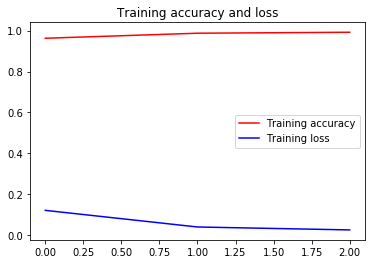

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
loss = history2.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training accuracy and loss')
plt.legend(loc=0)
plt.figure()


plt.show()